# Pizza case study - submission by Diwakar Sinha
## Q1 ) the ideal no of components the features can be reduced to

we use PCA to solve this question

The main idea behind PCA is to identify the directions in the data along which it varies the most. These directions are called principal components. The first principal component captures the largest possible variance in the data, and each subsequent component captures the remaining variance in descending order. In this way, PCA provides a way to rank the features or variables based on their importance in explaining the variability of the data.

PCA works by computing the eigenvectors and eigenvalues of the covariance matrix of the data. The eigenvectors represent the principal components, while the corresponding eigenvalues indicate the amount of variance explained by each component. By selecting a subset of the principal components, we can reduce the dimensionality of the data while retaining most of the information.

The reduced-dimensional representation obtained through PCA can be useful for various purposes. It can help visualize high-dimensional data in two or three dimensions, identify important features or variables, remove redundant or noisy features, and improve computational efficiency in subsequent analysis tasks.

To determine the ideal number of components for our analysis, we will follow these steps:

* 1) Standardize the data: Before performing PCA, it is important to standardize the variables so that they have a mean of 0 and a standard deviation of 1. This ensures that all variables are on the same scale.

* 2) Perform PCA: Apply PCA to the standardized data. This will produce a set of principal components, which are linear combinations of the original variables.

* 3) Check the explained variance: Examine the amount of variance explained by each principal component. The explained variance tells you how much information is retained by each component.

* 4) we will plot a scree plot or cumulative explained variance plot to visualize the explained variance for each component.

* 5) Determine the number of components: Look for the elbow point in the scree plot or the point where the cumulative explained variance reaches a satisfactory level.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# load dataset
data = pd.read_csv('Pizza.csv')
data

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...,...
295,J,34044,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,24069,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,34039,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,14044,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [3]:
df= data.drop(['brand','id'], axis=1)
df

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [4]:
# we see a large value variaion therefore we shall scale the data
# Step 1) Normalizing the data using Standarscaler
X = StandardScaler().fit_transform(df)

In [5]:
X

array([[-1.37181459,  1.25418127,  2.74984143, ...,  2.97668662,
        -1.22751105,  2.68012924],
       [-1.30156227,  1.22771661,  2.64047481, ...,  3.03077869,
        -1.21362189,  2.53473344],
       [-1.31624186,  1.03000998,  2.85139615, ...,  2.59804213,
        -1.22584435,  2.71243942],
       ...,
       [ 0.3823963 , -0.36794707, -0.46866201, ..., -0.07951534,
         0.1730719 , -0.56704362],
       [ 0.70220164, -0.45823828, -0.56352082, ..., -0.29588362,
         0.08918137, -0.82552504],
       [ 0.62251244, -0.53918903, -0.52780927, ..., -0.26883759,
         0.14529358, -0.7447496 ]])

In [6]:
# step 2) Perform PCA
pca = PCA()
pca.fit(X)

PCA()

In [7]:
# step 3) calulate explained variance 
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.95968842e-01, 3.27208198e-01, 5.92231918e-02, 1.35963182e-02,
       3.95385973e-03, 4.82299078e-05, 1.35982576e-06])

In [8]:
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.59596884, 0.92317704, 0.98240023, 0.99599655, 0.99995041,
       0.99999864, 1.        ])

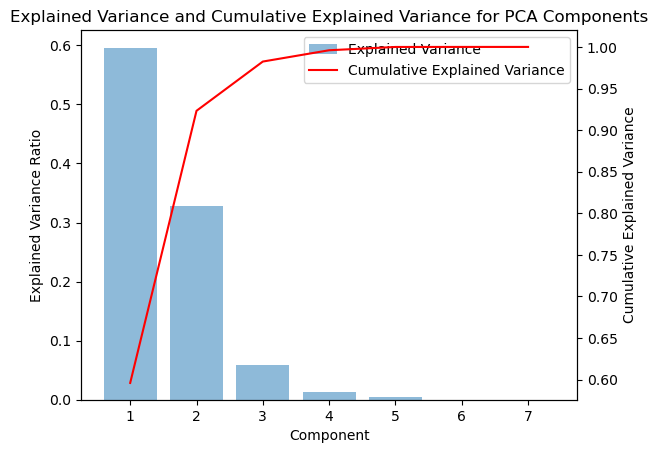

In [9]:
# Plot the explained variance and cumulative explained variance
fig, ax1 = plt.subplots()
# Plot explained variance as a bar plot
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, label='Explained Variance')
ax1.set_xlabel('Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Explained Variance and Cumulative Explained Variance for PCA Components')

# Create a second y-axis for cumulative explained variance
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, color='r', label='Cumulative Explained Variance')
ax2.set_ylabel('Cumulative Explained Variance')

# Combine the legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels)

plt.show()


Find the ideal number of components in which all the components can be reduced.
to do this we use EigenValues


In [10]:
# Eigen values are obtained by 
pca.explained_variance_

array([4.18573434e+00, 2.29811778e+00, 4.15948838e-01, 9.54925358e-02,
       2.77695834e-02, 3.38738483e-04, 9.55061572e-06])

Text(0.5, 1.0, 'Scree Plot')

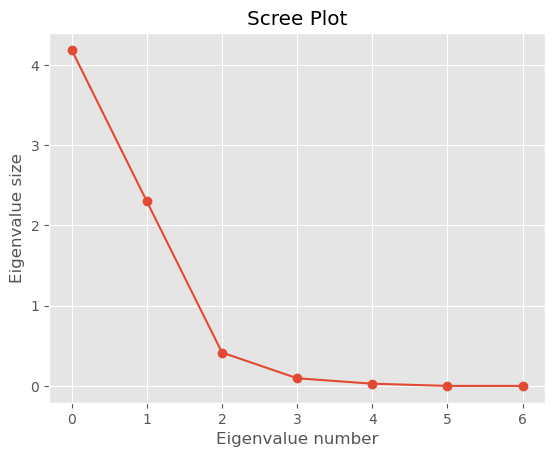

In [11]:
# step 4) Plotting Scree Plot
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [ ]:
# step 5)

### using method 5 ) Kaiser rule as Reference given here  https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d

## Keeping componenents with Eigen value size > 1 
### 1st 2 points have value greater than 1

### we conclude that the ideal no of components is 2

### Q1.	You wanted to shrink the information into certain number of components. And the ideal number of components you found is:

### a.	2 correct answer

b.	3 

c.	4

d.	5


 ### Q2.	And the components you got are having the information in range of:
 
 ### Ans : Observing the Cumulative Explained Variance for 2 components in steps above we get 92.317% which lies in range a. 92-94% 

### a.	92-94% Correct Answer

b.	94-96%

c.	96-98%

d.	98-100%


### Q3 how  to find out the important features that are impacting on deciding brand of pizzas:

In [12]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv('Pizza.csv')  

# Split the dataset into features (X) and target variable (y)
X = df.drop(['brand', 'id'], axis=1)  # Remove 'brand' and 'id' columns as they are not features
y = df['brand']

# Create a Random Forest classifier object
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [13]:
# Get the feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values('Importance', ascending=False)
importance_df

,Feature,Importance
0,mois,0.181131
1,prot,0.179102
3,ash,0.151193
5,carb,0.144289
4,sodium,0.134389
6,cal,0.130058
2,fat,0.079839


In [14]:
# Print the feature importances in the order of importance
print(importance_df['Feature'].tolist())

['mois', 'prot', 'ash', 'carb', 'sodium', 'cal', 'fat']


 
3.	Also wanted to the important features that are impacting on deciding brand of pizzas:

a.	Mois, prot, fat, ash, sodium, carbohydrate, calories

b.	Mois, fat, ash, sodium, carbohydrate, calories

c.	Mois, prot, fat, ash, carbohydrate, calories

d.	Mois, prot, fat, ash, sodium, carbohydrate

### Ans 3 : My answer does not match any of the options given 

### Q4 : 4.	With which technique you got highest accuracy:

a.	Forward feature selection with Random forest

b.	Backward selection with Random forest 

c.	Only Random Forest

d.	Both a and b


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector

# Load the dataset
df = pd.read_csv('Pizza.csv') 

# Split the dataset into features (X) and target variable (y)
X = df.drop(['brand', 'id'], axis=1)  # Remove 'brand' and 'id' columns as they are not features
y = df['brand']




In [16]:
# Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [17]:
# Perform forward feature selection
forward_selector = SequentialFeatureSelector(rf, n_features_to_select=5, direction='forward')
forward_X = forward_selector.fit_transform(X, y)

In [18]:
# Perform backward feature selection
backward_selector = SequentialFeatureSelector(rf, n_features_to_select=5, direction='backward')
backward_X = backward_selector.fit_transform(X, y)

In [19]:
# Calculate cross-validated accuracy scores
forward_scores = cross_val_score(rf, forward_X, y, cv=5)
backward_scores = cross_val_score(rf, backward_X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

In [20]:
# Print the mean accuracy scores for each technique
print("Forward feature selection with Random Forest:", forward_scores.mean())
print("Backward feature selection with Random Forest:", backward_scores.mean())
print("Random Forest without feature selection:", rf_scores.mean())

Forward feature selection with Random Forest: 0.9033333333333333
Backward feature selection with Random Forest: 0.9099999999999999
Random Forest without feature selection: 0.9033333333333333


### Ans 4: The highest accuracy is obtained with Backward feature selection with Random Forest.

### Q5.	Which brand has the highest test to prediction ratio

In [22]:
# Lets Import the libraries and data set

import pandas as pd

from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('Pizza.csv') 
df= df.drop (['id'],axis=1)
df.head()
# Split the dataset into features (X) and target variable (y)
#X = df.drop(['brand', 'id'], axis=1)  # Remove 'brand' and 'id' columns as they are not features
#y = df['brand']

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67


In [23]:
df.dtypes

brand      object
mois      float64
prot      float64
fat       float64
ash       float64
sodium    float64
carb      float64
cal       float64
dtype: object

In [24]:
# converting brand into catgorical 

df['brand'] = df['brand'].astype("category")

# Lets check the data type again

df.dtypes

brand     category
mois       float64
prot       float64
fat        float64
ash        float64
sodium     float64
carb       float64
cal        float64
dtype: object

In [25]:
# Also check if any column have missing values

df.isnull().sum()

brand     0
mois      0
prot      0
fat       0
ash       0
sodium    0
carb      0
cal       0
dtype: int64

In [26]:
# Step 1: Prepare the data Find your X (Input Variable) and y (Target) variable

y = df[['brand']]

X = df.drop(columns = ['brand'])

In [27]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(240, 60, 240, 60)

In [28]:

# Step 3: Train the random forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_33912\2993647768.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier()

In [29]:

# Step 4: Make predictions
y_test['Pred_brand']= clf.predict(X_test)
y_test


,brand,Pred_brand
203,G,G
266,I,I
152,F,F
9,A,A
233,H,H
226,H,H
196,G,G
109,D,D
5,A,A
175,F,F


In [30]:
y_test.dtypes

brand         category
Pred_brand      object
dtype: object

In [31]:
# converting brand into catgorical 

y_test['Pred_brand'] = y_test['Pred_brand'].astype("category")

# Lets check the data type again

y_test.dtypes

brand         category
Pred_brand    category
dtype: object

In [32]:
# Count the occurrences of each brand in the 'brand' column
brand_counts = y_test['brand'].value_counts().reset_index()
brand_counts.columns = ['brand', 'test_count']
brand_counts

,brand,test_count
0,H,11
1,D,8
2,C,7
3,A,6
4,F,6
5,J,6
6,B,5
7,G,5
8,I,4
9,E,2


In [33]:

# Count the occurrences of each brand in the 'Pred_brand' column
pred_counts = y_test['Pred_brand'].value_counts().reset_index()
pred_counts.columns = ['brand', 'predicted_count']
pred_counts

,brand,predicted_count
0,H,12
1,D,9
2,A,6
3,C,6
4,F,6
5,J,6
6,B,5
7,G,5
8,I,4
9,E,1


In [34]:

# Merge the two counts into a single DataFrame
result = pd.merge(brand_counts, pred_counts, on='brand')

# Display the resulting DataFrame
print(result)

  brand  test_count  predicted_count
0     H          11               12
1     D           8                9
2     C           7                6
3     A           6                6
4     F           6                6
5     J           6                6
6     B           5                5
7     G           5                5
8     I           4                4
9     E           2                1


### Ans5 : from output of above we observe 
test_count of H> predicted_count of H 
& test_count of G, I, J == predicted_count of G,I,J
#### Therefore in absence of further guidance defining test to prediction ratio  as 
### test to predicted ratio(TPR) = test_count / predicted_count
### we conclude that TPR of G,I&J are the same = 1 & H is least <1